In [15]:
#use simple RNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


result = pd.read_csv('tatamotors_all')

#extract close column as we just need it, then clean it and convert it to float type

df=result[['close ']]

df.replace(',','', regex=True, inplace=True)

df['close '] = df['close '].astype(float)

# standardize the close column in (0,1) range

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

df=scaler.fit_transform(np.array(df).reshape(-1,1))


In [22]:
# result.to_csv('tatamotors_all')

In [3]:
# splite data to train and test data 
training_size=int(len(df)*0.65)
test_size= len(df)-training_size
train_data,test_data= df[0:training_size,:],df[training_size:len(df),:1]

# create timesteps in a size of 200 

def create_dataset(dataset, timestep=1):
    dataX,dataY=[],[]
    for i in range (len(dataset)-timestep-1):
        a = dataset[i:(i+timestep),0]
        dataX.append(a)
        dataY.append(dataset[i+timestep,0])
    return np.array(dataX),np.array(dataY)

timestep=200
xtrain,ytrain=create_dataset(train_data,timestep)
xtest,ytest=create_dataset(test_data,timestep)

#reshape input to be [samples, timesteps, features] which is required for LSTM

xtrain=xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest=xtest.reshape(xtest.shape[0], xtrain.shape[1], 1)

In [2]:
# use RNN 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RNN
from tensorflow.keras.layers import SimpleRNN

In [4]:
#simple RNN

In [5]:
model = Sequential()
model.add(SimpleRNN(units=50,  return_sequences=True, input_shape=(200,1), activation="relu"))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(SimpleRNN(units=50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 200, 50)           2600      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 200, 50)           5050      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 12,751
Trainable params: 12,751
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=500,batch_size=64,verbose=1)

Epoch 1/500
48/48 [==============================] - 29s 375ms/step - loss: 0.0231 - val_loss: 0.0018
Epoch 2/500
48/48 [==============================] - 10s 200ms/step - loss: 3.5938e-04 - val_loss: 0.0012
Epoch 3/500
48/48 [==============================] - 8s 177ms/step - loss: 2.6688e-04 - val_loss: 0.0011
Epoch 4/500
48/48 [==============================] - 8s 176ms/step - loss: 2.5846e-04 - val_loss: 0.0012
Epoch 5/500
48/48 [==============================] - 8s 177ms/step - loss: 2.3888e-04 - val_loss: 0.0010
Epoch 6/500
48/48 [==============================] - 8s 175ms/step - loss: 1.9504e-04 - val_loss: 8.8473e-04
Epoch 7/500
48/48 [==============================] - 9s 178ms/step - loss: 1.9589e-04 - val_loss: 0.0010
Epoch 8/500
48/48 [==============================] - 8s 175ms/step - loss: 1.8678e-04 - val_loss: 9.4475e-04
Epoch 9/500
48/48 [==============================] - 8s 174ms/step - loss: 2.0950e-04 - val_loss: 6.8770e-04
Epoch 10/500
48/48 [=========================

48/48 [==============================] - 10s 205ms/step - loss: 9.4256e-05 - val_loss: 4.6920e-04
Epoch 76/500
48/48 [==============================] - 9s 192ms/step - loss: 9.0125e-05 - val_loss: 4.9026e-04
Epoch 77/500
48/48 [==============================] - 10s 208ms/step - loss: 8.1309e-05 - val_loss: 4.1466e-04
Epoch 78/500
48/48 [==============================] - 9s 188ms/step - loss: 7.4308e-05 - val_loss: 4.5107e-04
Epoch 79/500
48/48 [==============================] - 8s 172ms/step - loss: 7.7187e-05 - val_loss: 4.9177e-04
Epoch 80/500
48/48 [==============================] - 9s 179ms/step - loss: 8.4837e-05 - val_loss: 4.8432e-04
Epoch 81/500
48/48 [==============================] - 8s 176ms/step - loss: 1.0870e-04 - val_loss: 4.2451e-04
Epoch 82/500
48/48 [==============================] - 8s 174ms/step - loss: 8.0239e-05 - val_loss: 5.7215e-04
Epoch 83/500
48/48 [==============================] - 9s 181ms/step - loss: 9.3424e-05 - val_loss: 4.0643e-04
Epoch 84/500
48/48 [=

48/48 [==============================] - 8s 172ms/step - loss: 7.5441e-05 - val_loss: 3.5165e-04
Epoch 150/500
48/48 [==============================] - 8s 176ms/step - loss: 7.4208e-05 - val_loss: 3.8208e-04
Epoch 151/500
48/48 [==============================] - 8s 171ms/step - loss: 7.9667e-05 - val_loss: 3.9765e-04
Epoch 152/500
48/48 [==============================] - 8s 172ms/step - loss: 7.8114e-05 - val_loss: 3.3148e-04
Epoch 153/500
48/48 [==============================] - 8s 175ms/step - loss: 7.6130e-05 - val_loss: 3.3195e-04
Epoch 154/500
48/48 [==============================] - 8s 177ms/step - loss: 7.5656e-05 - val_loss: 3.6699e-04
Epoch 155/500
48/48 [==============================] - 8s 173ms/step - loss: 9.0980e-05 - val_loss: 4.5371e-04
Epoch 156/500
48/48 [==============================] - 8s 171ms/step - loss: 8.3516e-05 - val_loss: 3.6500e-04
Epoch 157/500
48/48 [==============================] - 8s 173ms/step - loss: 8.8407e-05 - val_loss: 4.1868e-04
Epoch 158/500
4

Epoch 223/500
48/48 [==============================] - 8s 175ms/step - loss: 9.1868e-05 - val_loss: 4.0865e-04
Epoch 224/500
48/48 [==============================] - 8s 171ms/step - loss: 7.9263e-05 - val_loss: 3.1218e-04
Epoch 225/500
48/48 [==============================] - 8s 172ms/step - loss: 8.1454e-05 - val_loss: 3.0869e-04
Epoch 226/500
48/48 [==============================] - 8s 173ms/step - loss: 7.5651e-05 - val_loss: 3.1799e-04
Epoch 227/500
48/48 [==============================] - 8s 172ms/step - loss: 7.8266e-05 - val_loss: 3.4864e-04
Epoch 228/500
48/48 [==============================] - 8s 175ms/step - loss: 7.1344e-05 - val_loss: 3.3558e-04
Epoch 229/500
48/48 [==============================] - 8s 172ms/step - loss: 7.0502e-05 - val_loss: 3.8149e-04
Epoch 230/500
48/48 [==============================] - 8s 174ms/step - loss: 7.0234e-05 - val_loss: 3.7412e-04
Epoch 231/500
48/48 [==============================] - 8s 171ms/step - loss: 8.4313e-05 - val_loss: 4.3133e-04
E

Epoch 297/500
48/48 [==============================] - 8s 173ms/step - loss: 8.7947e-05 - val_loss: 3.0757e-04
Epoch 298/500
48/48 [==============================] - 8s 173ms/step - loss: 8.1754e-05 - val_loss: 3.2629e-04
Epoch 299/500
48/48 [==============================] - 8s 173ms/step - loss: 6.7971e-05 - val_loss: 3.4837e-04
Epoch 300/500
48/48 [==============================] - 8s 174ms/step - loss: 8.0920e-05 - val_loss: 3.4719e-04
Epoch 301/500
48/48 [==============================] - 8s 173ms/step - loss: 6.9920e-05 - val_loss: 3.5184e-04
Epoch 302/500
48/48 [==============================] - 8s 173ms/step - loss: 6.6068e-05 - val_loss: 3.4175e-04
Epoch 303/500
48/48 [==============================] - 8s 173ms/step - loss: 6.8397e-05 - val_loss: 3.2321e-04
Epoch 304/500
48/48 [==============================] - 8s 171ms/step - loss: 7.6197e-05 - val_loss: 4.3314e-04
Epoch 305/500
48/48 [==============================] - 8s 176ms/step - loss: 8.5597e-05 - val_loss: 4.1398e-04
E

Epoch 371/500
48/48 [==============================] - 8s 176ms/step - loss: 7.2345e-05 - val_loss: 4.0897e-04
Epoch 372/500
48/48 [==============================] - 8s 172ms/step - loss: 7.0373e-05 - val_loss: 4.3587e-04
Epoch 373/500
48/48 [==============================] - 8s 172ms/step - loss: 6.8409e-05 - val_loss: 4.4132e-04
Epoch 374/500
48/48 [==============================] - 9s 183ms/step - loss: 7.4756e-05 - val_loss: 3.7991e-04
Epoch 375/500
48/48 [==============================] - 8s 172ms/step - loss: 6.6513e-05 - val_loss: 3.9385e-04
Epoch 376/500
48/48 [==============================] - 8s 172ms/step - loss: 6.2718e-05 - val_loss: 4.3994e-04
Epoch 377/500
48/48 [==============================] - 8s 171ms/step - loss: 7.2933e-05 - val_loss: 3.8729e-04
Epoch 378/500
48/48 [==============================] - 9s 178ms/step - loss: 7.3191e-05 - val_loss: 3.8015e-04
Epoch 379/500
48/48 [==============================] - 8s 170ms/step - loss: 7.4037e-05 - val_loss: 4.8407e-04
E

Epoch 445/500
48/48 [==============================] - 8s 172ms/step - loss: 6.8114e-05 - val_loss: 3.5747e-04
Epoch 446/500
48/48 [==============================] - 8s 173ms/step - loss: 8.1018e-05 - val_loss: 3.6329e-04
Epoch 447/500
48/48 [==============================] - 8s 173ms/step - loss: 7.3715e-05 - val_loss: 3.1789e-04
Epoch 448/500
48/48 [==============================] - 8s 174ms/step - loss: 7.6844e-05 - val_loss: 3.4334e-04
Epoch 449/500
48/48 [==============================] - 8s 172ms/step - loss: 8.2582e-05 - val_loss: 3.5522e-04
Epoch 450/500
48/48 [==============================] - 8s 172ms/step - loss: 7.2446e-05 - val_loss: 3.6112e-04
Epoch 451/500
48/48 [==============================] - 8s 172ms/step - loss: 7.7129e-05 - val_loss: 3.5388e-04
Epoch 452/500
48/48 [==============================] - 8s 172ms/step - loss: 6.5175e-05 - val_loss: 3.6238e-04
Epoch 453/500
48/48 [==============================] - 8s 171ms/step - loss: 6.7814e-05 - val_loss: 3.5635e-04
E

In [8]:
# testdf1= pd.read_csv('Quote-Equity-MARUTI-EQ-01-01-2017-to-31-12-2017.csv')

# testdf2= pd.read_csv('Quote-Equity-MARUTI-EQ-01-01-2015-to-31-12-2016.csv')

# testdf3= pd.read_csv('Quote-Equity-MARUTI-EQ-01-01-2013-to-31-12-2014.csv')

# testdf4= pd.read_csv('Quote-Equity-MARUTI-EQ-01-01-2011-to-31-12-2012.csv')

# testdf5= pd.read_csv('Quote-Equity-MARUTI-EQ-01-01-2009-to-31-12-2010.csv')

# testdf6= pd.read_csv('Quote-Equity-MARUTI-EQ-01-01-2007-to-31-12-2008.csv')

# testframes = [testdf1,testdf2,testdf3,testdf4,testdf5, testdf6]

# testresult = pd.concat(testframes)

# testresult['Date '] = pd.to_datetime(testresult['Date '], errors='coerce')

# testresult = testresult.sort_values(by='Date ')

In [9]:
testresult = pd.read_csv('testMaruti')

In [10]:
tdf=testresult[['close ']]

tdf.replace(',','', regex=True, inplace=True)

tdf['close '] = tdf['close '].astype(float)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
tdf=scaler.fit_transform(np.array(tdf).reshape(-1,1))

timestep=200
testx,testy=create_dataset(tdf,timestep)

testx=testx.reshape(testx.shape[0], testx.shape[1], 1)

predict=model.predict(testx)

testy = testy.reshape(2524,1)

# measure the MAPE metric introduced by paper

for i in range(0,len(predict)):
    sum = abs(testy[i][0]-predict[i][0])/abs(testy[i][0])

mape = sum/len(predict)

print(mape)

1.3138218269952428e-05


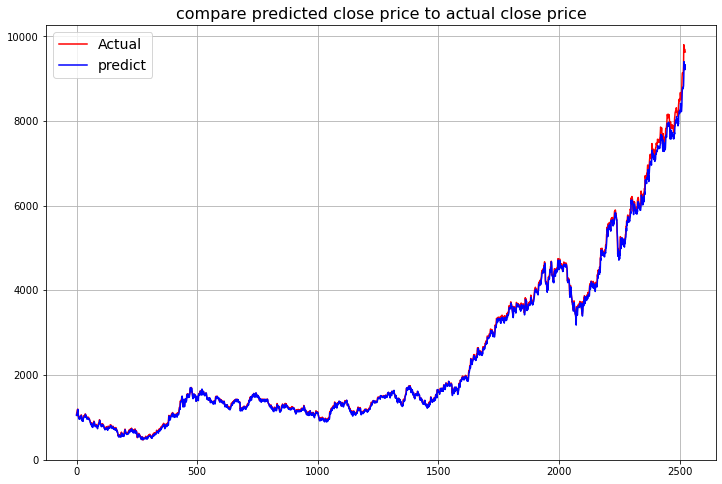

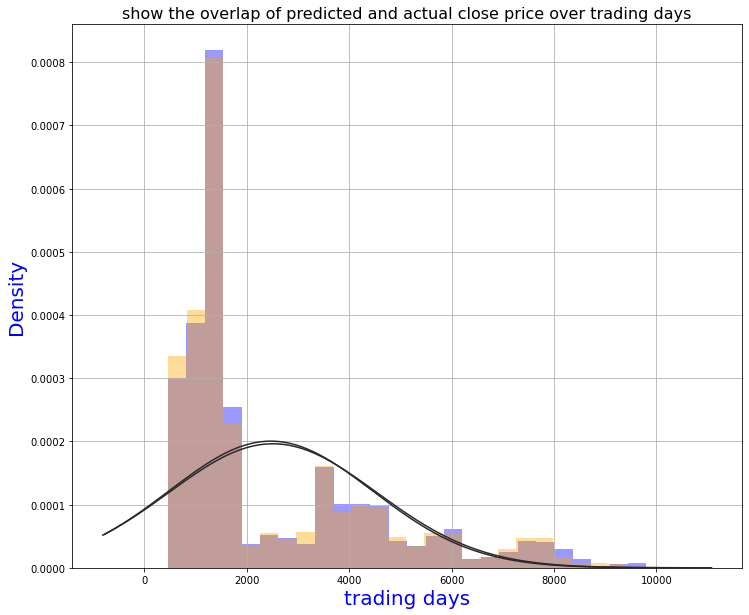

In [11]:
# plot predicted and actual price 

# return to actual value (destandardization)
predictinv = scaler.inverse_transform(predict) 
testyinv = scaler.inverse_transform(testy)

plt.figure(figsize=(12, 8))
plt.plot(testyinv, '-r', label='Actual')
plt.plot(predictinv, '-b', label='predict')
plt.legend(fontsize=14)
plt.title('compare predicted close price to actual close price', fontsize=16)
plt.grid()

# how histogram of two actual and predicted values are cover each other
from scipy.stats import norm
plt.figure(figsize=(12,10))
sns.distplot(testyinv,fit=norm, kde=False,color='b', label='Actual')
sns.distplot(predictinv,fit=norm, kde=False, color='orange', label='predicted')
plt.xlabel('trading days',fontsize=20,color='b')
plt.ylabel('Density',fontsize=20,color='b')
plt.title('show the overlap of predicted and actual close price over trading days', fontsize=16)
plt.grid()